In [184]:
import numpy as np
import pandas as pd
import json
import csv
import requests
import datetime

In [373]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]= (12,8)
matplotlib.rcParams["figure.facecolor"]="#00000000"

import seaborn as sns
sns.set_style("darkgrid")
sns.set(font="Verdana")
import plotly.express as px


In [186]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

# GETTING DATA

**CoinMarketCap API**
* Categories endpoint
* Category endpoint
* Latest endpoint

**Rate Limit**
* https://pro.coinmarketcap.com/api/features

## 1. Categories Endpoint

* https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyCategories

<b> Send Request to Categories Endpoint </b>

In [ ]:
api_key_1 = "xxxxx"
api_key_2 = "yyyyy"

In [187]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories"
parameters = {
  'start':'1',
  'limit':'1000'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key_1
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  categories_json = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [189]:
len(categories_json["data"])

154

In [190]:
categories_json["data"][0]

{'id': '6246aade491a5b4fe942fa3f',
 'name': 'Move To Earn',
 'title': 'Move To Earn',
 'description': 'Move To Earn',
 'num_tokens': 11,
 'avg_price_change': 7.2301747445454545,
 'market_cap': 1470324700.76,
 'market_cap_change': 8.079863636363637,
 'volume': 816514624.405144,
 'volume_change': 6.37658181818182,
 'last_updated': '2022-04-01T07:40:03.647Z'}

<b> Create a categories dataframe </b>

In [191]:
categories_df = pd.DataFrame(categories_json["data"])

In [192]:
categories_df.head(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,6246aade491a5b4fe942fa3f,Move To Earn,Move To Earn,Move To Earn,11,7.230175,1.470325e+09,8.079864,8.165146e+08,6.376582,2022-04-01T07:40:03.647Z
1,62224b92b3096e3849858941,Kommunitas Launchpad,Kommunitas Launchpad,Kommunitas Launchpad,31,2.015745,3.164320e+07,-0.022581,6.565537e+06,105.264031,2022-03-04T17:37:49.126Z
2,620a2bac3ee27777ad05bdaa,Injective Ecosystem,Injective Ecosystem,Injective Ecosystem,62,3.350193,5.586965e+11,11.630595,7.935625e+10,-1.029736,2022-02-14T10:15:43.933Z


In [196]:
categories_df.tail(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
151,601cf8d2d8fd860e4ea5d96f,Polkadot Ecosystem,Top Polkadot Tokens by Market Capitalization,Polkadot is an open-source sharding multichain...,117,2.597570,3.461374e+10,2.391357,2.155147e+09,103.226555,2021-03-23 08:38:28.669
152,5fb62da404d1dd4c73744883,Storage,Top Storage Tokens by Market Capitalization,In blockchain-based decentralized cloud storag...,39,1.467604,9.773084e+09,1.503895,6.647659e+08,24.291219,2021-03-23 08:38:28.660
153,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,3.792842,1.493852e+11,3.293165,9.109602e+09,70.680444,2021-03-23 08:38:28.630


In [197]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 154 non-null    object        
 1   name               154 non-null    object        
 2   title              154 non-null    object        
 3   description        154 non-null    object        
 4   num_tokens         154 non-null    int64         
 5   avg_price_change   154 non-null    float64       
 6   market_cap         154 non-null    float64       
 7   market_cap_change  154 non-null    float64       
 8   volume             154 non-null    float64       
 9   volume_change      154 non-null    float64       
 10  last_updated       154 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 13.4+ KB


In [198]:
categories_df = categories_df.astype({"last_updated":"datetime64"})

In [199]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 154 non-null    object        
 1   name               154 non-null    object        
 2   title              154 non-null    object        
 3   description        154 non-null    object        
 4   num_tokens         154 non-null    int64         
 5   avg_price_change   154 non-null    float64       
 6   market_cap         154 non-null    float64       
 7   market_cap_change  154 non-null    float64       
 8   volume             154 non-null    float64       
 9   volume_change      154 non-null    float64       
 10  last_updated       154 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 13.4+ KB


<b> Sort the Dataframe by num_token Column</b>

In [201]:
categories_df = categories_df.sort_values(by=["num_tokens"], ascending=False, ignore_index=True)

In [202]:
categories_df.head(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,668667.498365,8.029647e+11,1.421735,1.022443e+11,1362.318797,2022-02-28 09:24:12.374
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,572,590.372786,4.175853e+10,1.807645,5.328538e+09,271.400095,2021-05-04 10:36:15.891
2,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,3.792842,1.493852e+11,3.293165,9.109602e+09,70.680444,2021-03-23 08:38:28.630


In [203]:
categories_df.tail(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
151,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,4.225481,1.084670e+08,4.229425,1.277623e+07,27.771950,2021-11-10 10:39:44.048
152,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,5.166630,2.267476e+07,2.488200,1.511074e+06,-4.010775,2021-11-13 13:14:02.229
153,61790e6ab0c3953ace8c8697,Farastarter,Farastarter,Farastarter,1,7.837633,3.384988e+06,7.837600,8.350889e+04,-12.478900,2021-11-13 13:14:05.366


<b> Check Number of Total Tokens/Coins </b>

In [204]:
categories_df["num_tokens"].sum()

10658

<b> Save Dataframe for Later Use </b>

In [205]:
categories_df.to_csv("data/categories_df.csv")

### VISUALIZATION: Categories Endpoint

In [206]:
categories_df = pd.read_csv("data/categories_df.csv",index_col=0)

**Number of Coins**

In [207]:
len(categories_df[categories_df["num_tokens"]>200])

11

In [208]:
num_token_above_200 = categories_df[categories_df["num_tokens"]>200]

Text(0, 0.5, '')

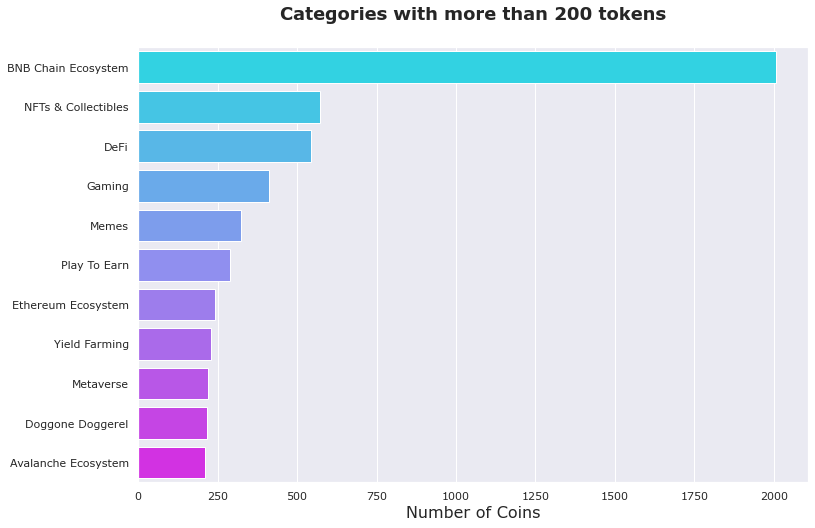

In [274]:
cat_200_bar = sns.barplot(x="num_tokens",
                y="name",
                data=num_token_above_200, palette="cool")
cat_200_bar.set_title("Categories with more than 200 tokens",y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
cat_200_bar.set_xlabel("Number of Coins", fontsize=16)
cat_200_bar.set_ylabel(None, fontsize=16)

In [228]:
num_token_above_10 = categories_df[categories_df["num_tokens"] <= 10]

Text(0, 0.5, '')

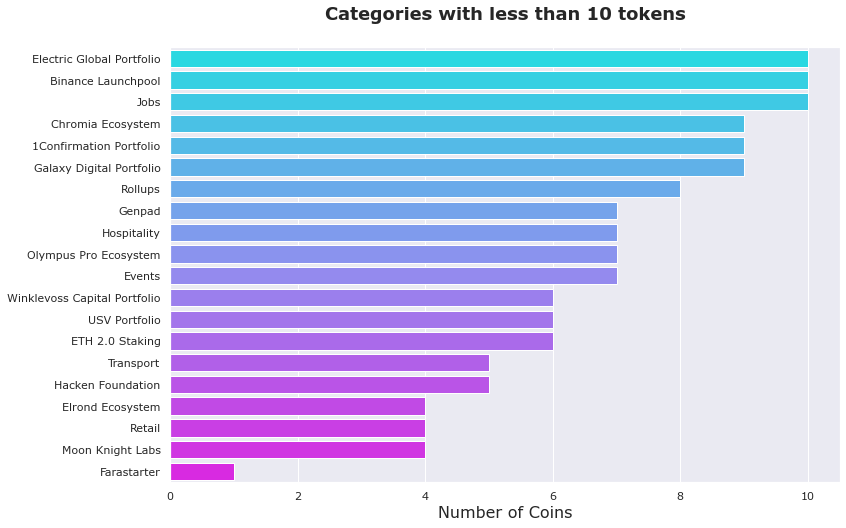

In [267]:
cat_less_coins = sns.barplot(y="name",
                             x="num_tokens",
                             data=num_token_above_10, palette="cool")

cat_less_coins.set_title("Categories with less than 10 tokens", y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
cat_less_coins.set_xlabel("Number of Coins", fontsize=16)
cat_less_coins.set_ylabel(None, fontsize=16)


**Market Cap**

In [259]:
mcap_top20 = categories_df.sort_values(['market_cap'], ascending=False)[0:20]

Text(0, 0.5, '')

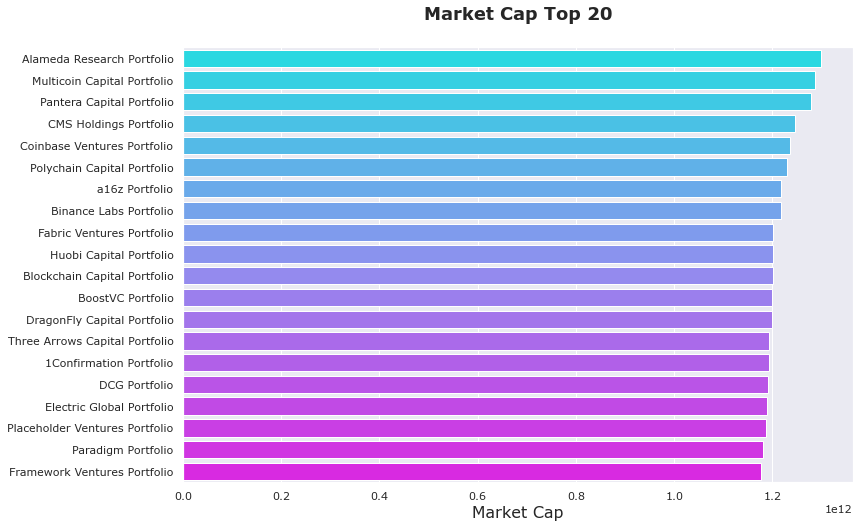

In [266]:
cmc_mcap = sns.barplot(y="name",
                       x="market_cap",
                       data=mcap_top20, palette="cool")

cmc_mcap.set_title("Market Cap Top 20", y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
cmc_mcap.set_xlabel("Market Cap", fontsize=16)
cmc_mcap.set_ylabel(None, fontsize=16)

In [261]:
mcap_bottom20 = categories_df.sort_values(['market_cap'], ascending=True)[0:20]

Text(0, 0.5, '')

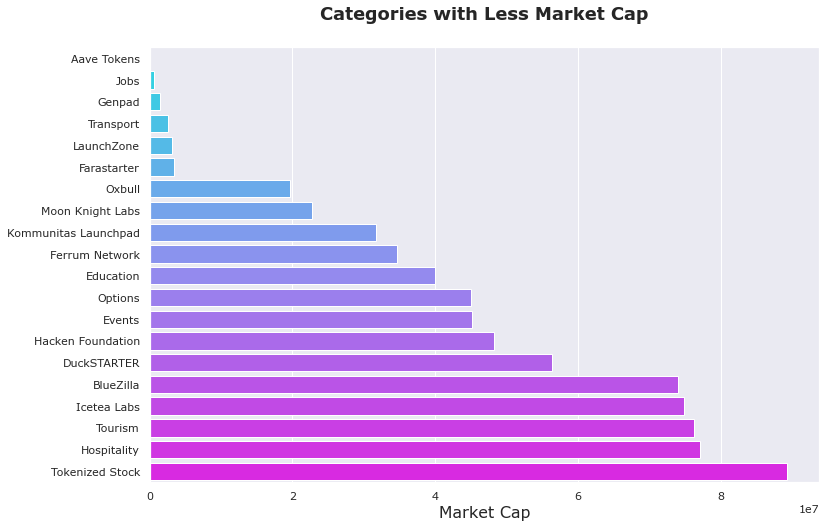

In [265]:
cmc_mcap_low = sns.barplot(y="name",
                       x="market_cap",
                       data=mcap_bottom20, palette="cool")

cmc_mcap_low.set_title("Categories with Less Market Cap", y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
cmc_mcap_low.set_xlabel("Market Cap", fontsize=16)
cmc_mcap_low.set_ylabel(None, fontsize=16)


## 2. Listing Latest Endpoint

* https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyListingsLatest

In [79]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
parameters = {
  'start':'1',
  'limit':'5000',
  'sort':"date_added"
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key_2
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  latest_json1 = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [80]:
len(latest_json1["data"])

5000

In [84]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
parameters = {
  'start':'5001',
  'limit':'5000',
  'sort':"date_added"
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key_2
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  latest_json2 = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [85]:
len(latest_json2["data"])

4911

In [86]:
list1 = list(latest_json1["data"])
len(list1)

5000

In [87]:
list2 = list(latest_json2["data"])
len(list2)

4911

In [88]:
data_list = list1 + list2
len(data_list)

9911

**DataFrame Raw**

In [89]:
latest_df_raw = pd.DataFrame(data_list)

In [90]:
latest_df_raw.to_csv("data/latest_df_raw.csv")

In [92]:
data_list[0]

{'id': 19510,
 'name': 'MilkySwap',
 'symbol': 'MILKY',
 'slug': 'milkyswap',
 'num_market_pairs': 1,
 'date_added': '2022-04-13T10:17:10.000Z',
 'tags': [],
 'max_supply': None,
 'circulating_supply': 0,
 'total_supply': 0,
 'platform': {'id': 2010,
  'name': 'Milkomeda',
  'symbol': 'ADA',
  'slug': 'cardano',
  'token_address': '0x063a5e4cd5e15ac66ea47134eb60e6b30a51b2bf'},
 'cmc_rank': 5136,
 'self_reported_circulating_supply': None,
 'self_reported_market_cap': None,
 'last_updated': '2022-04-13T22:53:00.000Z',
 'quote': {'USD': {'price': 0.23953838155768162,
   'volume_24h': 32973.0860546,
   'volume_change_24h': 200503.2782,
   'percent_change_1h': -0.24338794,
   'percent_change_24h': 2.23834283,
   'percent_change_7d': 2.23834283,
   'percent_change_30d': 2.23834283,
   'percent_change_60d': 2.23834283,
   'percent_change_90d': 2.23834283,
   'market_cap': 0,
   'market_cap_dominance': 0,
   'fully_diluted_market_cap': 0,
   'last_updated': '2022-04-13T22:53:00.000Z'}}}

**Create a Column Names**

In [93]:
col_names = ["id", 
             "name", 
             "symbol", 
             "date_added",
             "num_market_pairs",
             "max_supply", 
             "circulating_supply", 
             "total_supply", 
             "market_cap",
             "platform", 
             "token_address"]

In [94]:
df=pd.DataFrame(columns=col_names)

**Add Data to Columns**

In [95]:
%%time
for i in data_list:
    
    coin_id = i["id"]
    name = i["name"]
    symbol = i["symbol"]
    date_added = i["date_added"]
    date_added = str(date_added).split("T")[0]
    num_market_pairs = i["num_market_pairs"]
    max_supply = i["max_supply"]
    circulating_supply = i["circulating_supply"]
    total_supply = i["total_supply"]
    market_cap = i["quote"]["USD"]["market_cap"]
       
    if i["platform"]!=None:    
        platform = i["platform"]["name"]
        token_address = i["platform"]["token_address"]       
    else:
        platform = np.nan
        token_address = np.nan
                                 
    df = df.append({"id":coin_id, 
                      "name":name,
                      "symbol":symbol,
                      "date_added":date_added,
                      "num_market_pairs":num_market_pairs,
                      "max_supply":max_supply,
                      "circulating_supply":circulating_supply,
                      "total_supply":total_supply,
                      "market_cap":market_cap,
                      "platform":platform,
                      "token_address":token_address       
                      }, ignore_index=True)

CPU times: user 44.1 s, sys: 459 ms, total: 44.6 s
Wall time: 44.9 s


In [96]:
len(df)

9911

In [100]:
df.head(2)

,id,name,symbol,date_added,num_market_pairs,max_supply,circulating_supply,total_supply,market_cap,platform,token_address
0,19510,MilkySwap,MILKY,2022-04-13,1,None,0,0,0,Milkomeda,0x063a5e4cd5e15ac66ea47134eb60e6b30a51b2bf
1,19509,PAYZ PAYMENTS,PAYZ,2022-04-13,2,30000000,0,30000000,0,BNB Smart Chain (BEP20),0x88cF0A02371b9F00577552d673cF2ea0C18D0B14


In [101]:
df.tail(2)

,id,name,symbol,date_added,num_market_pairs,max_supply,circulating_supply,total_supply,market_cap,platform,token_address
9909,2,Litecoin,LTC,2013-04-28,764,84000000,70062531.277915,84000000,7751154933.241492,NaN,NaN
9910,1,Bitcoin,BTC,2013-04-28,9321,21000000,19010912,19010912,784860715195.588135,NaN,NaN


In [102]:
df_copy = df.copy()

**Split Date Fuction**

In [103]:
def date_split(df):
    df["date_added"] = pd.to_datetime(df["date_added"])
    df["year"] = df["date_added"].dt.year
    df["month"]= df["date_added"].dt.month
    df["day"]  = df["date_added"].dt.day

In [104]:
date_split(df_copy)

**Re-arrange columns**

In [105]:
df_copy = df_copy[['id','name','symbol','date_added','year','month','day','num_market_pairs','max_supply',
                   'circulating_supply', 'total_supply','market_cap',"platform","token_address"]]

**Change datatype on some columns**

In [106]:
df_copy = df_copy.astype({"id":"int64", 
                "num_market_pairs":"int64", 
                "max_supply":"float64",
                "circulating_supply":"float64", 
                "total_supply":"float64", 
                "market_cap":"float64"}) 

In [107]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9911 non-null   int64         
 1   name                9911 non-null   object        
 2   symbol              9911 non-null   object        
 3   date_added          9911 non-null   datetime64[ns]
 4   year                9911 non-null   int64         
 5   month               9911 non-null   int64         
 6   day                 9911 non-null   int64         
 7   num_market_pairs    9911 non-null   int64         
 8   max_supply          7020 non-null   float64       
 9   circulating_supply  9911 non-null   float64       
 10  total_supply        9911 non-null   float64       
 11  market_cap          9911 non-null   float64       
 12  platform            8537 non-null   object        
 13  token_address       8537 non-null   object      

In [108]:
df_copy.head(3)

,id,name,symbol,date_added,year,month,day,num_market_pairs,max_supply,circulating_supply,total_supply,market_cap,platform,token_address
0,19510,MilkySwap,MILKY,2022-04-13,2022,4,13,1,NaN,0.0,0.000000e+00,0.0,Milkomeda,0x063a5e4cd5e15ac66ea47134eb60e6b30a51b2bf
1,19509,PAYZ PAYMENTS,PAYZ,2022-04-13,2022,4,13,2,30000000.0,0.0,3.000000e+07,0.0,BNB Smart Chain (BEP20),0x88cF0A02371b9F00577552d673cF2ea0C18D0B14
2,19507,Peak Finance,PEAK,2022-04-13,2022,4,13,1,NaN,0.0,1.330724e+05,0.0,Metis Andromeda,0x1f5550a0f5f659e07506088a7919a88dff37218f


In [275]:
df_copy.tail(3)

,id,name,symbol,date_added,year,month,day,num_market_pairs,max_supply,circulating_supply,total_supply,market_cap,platform,token_address
9908,3,Namecoin,NMC,2013-04-28,2013,4,28,7,NaN,1.473640e+07,14736400.0,3.807301e+07,NaN,NaN
9909,2,Litecoin,LTC,2013-04-28,2013,4,28,764,84000000.0,7.006253e+07,84000000.0,7.751155e+09,NaN,NaN
9910,1,Bitcoin,BTC,2013-04-28,2013,4,28,9321,21000000.0,1.901091e+07,19010912.0,7.848607e+11,NaN,NaN


### VISUALIZATION: Latest Endpoint

In [295]:
sns.set(rc={"figure.figsize":(14, 8)})

Text(0, 0.5, '')

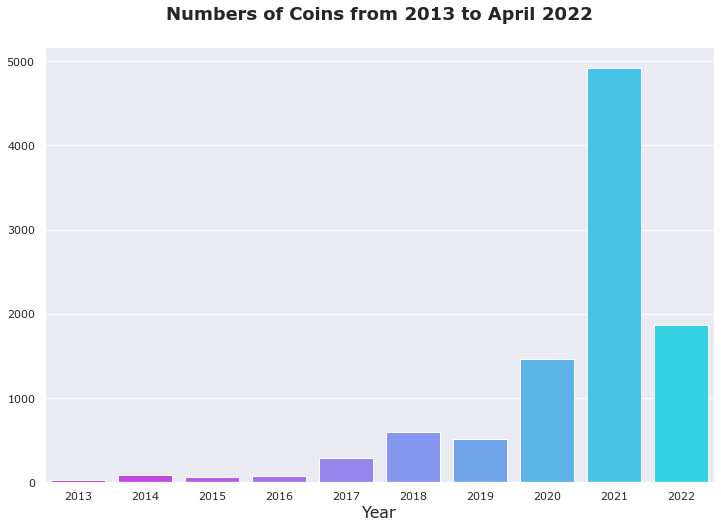

In [441]:
cmc_coin_total = sns.countplot(x="year",
                 data=df_copy, palette="cool_r")
cmc_coin_total.set_title("Numbers of Coins from 2013 to April 2022",y=1.05, fontdict= {'fontweight':'bold',"fontsize":18})
cmc_coin_total.set_xlabel("Year", fontsize=16)
cmc_coin_total.set_ylabel(None, fontsize=16)


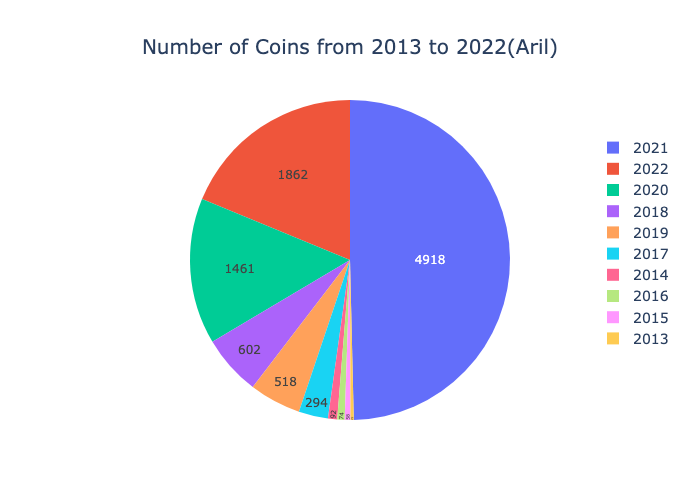

In [439]:
fig1 = px.pie(df_copy["year"], 
            values=df_copy["year"].value_counts().values, 
            names=df_copy["year"].value_counts().index, 
            title="Number of Coins from 2013 to 2022(Aril)")

fig1.update_traces(textposition='inside', hoverinfo='label+percent', textinfo='value')

fig1.update_layout(
      title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20},
     template="plotly_white")

fig1.update_layout(legend_font_size=14)
fig1.update_layout(legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.95))

#fig1.show()
fig1.show("png")


#### Platform

In [114]:
df_copy["platform"].value_counts()[0:20]

Ethereum                   3718
BNB Smart Chain (BEP20)    3340
Solana                      280
Avalanche C-Chain           226
Polygon                     180
Fantom                      157
Tron20                       79
BNB Beacon Chain (BEP2)      52
Cronos                       42
Harmony                      30
Chiliz                       30
Terra                        29
HECO                         28
Klaytn                       26
Tron10                       22
XRP Ledger                   21
Arbitrum                     21
OKExChain                    19
EOS                          19
Zilliqa                      16
Name: platform, dtype: int64

Text(0, 0.5, '')

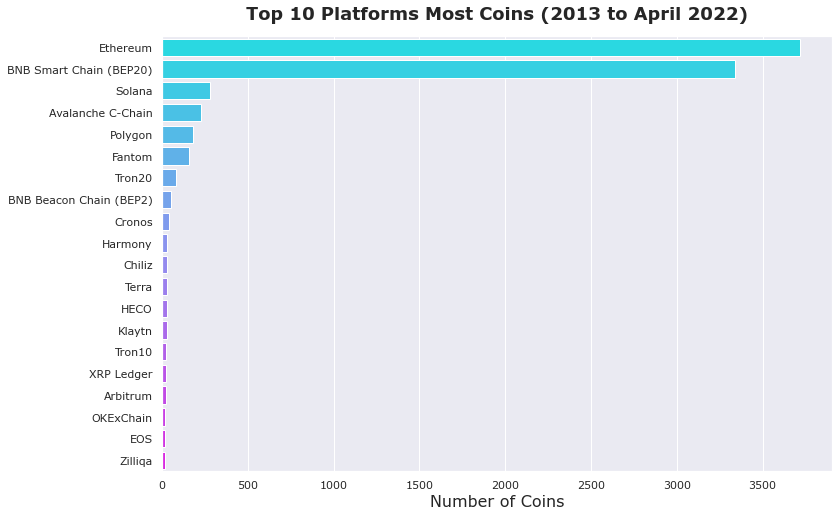

In [431]:
platform_bar = sns.countplot(y="platform",
                data=df_copy, palette="cool",
                order = df_copy["platform"].value_counts()[0:20].index)
platform_bar.set_title("Top 10 Platforms Most Coins (2013 to April 2022)",y=1.025, fontdict= {'fontweight':'bold',"fontsize":18})
platform_bar.set_xlabel("Number of Coins", fontsize=16)
platform_bar.set_ylabel(None, fontsize=16)

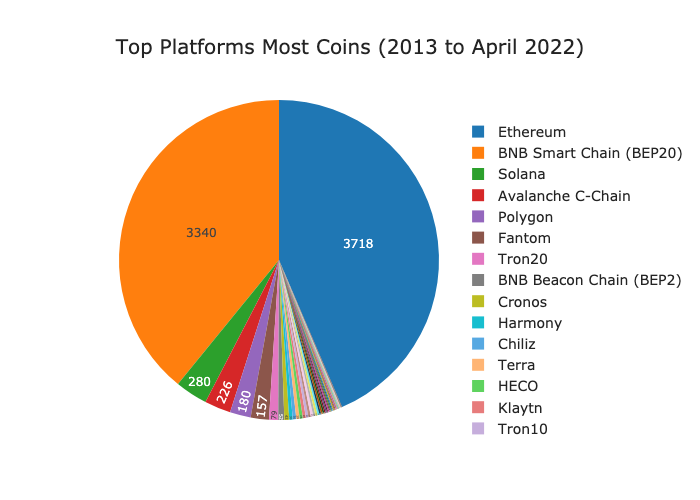

In [426]:
fig2 = px.pie(df_copy["platform"], 
              values=df_copy["platform"].value_counts().values, 
              names=df_copy["platform"].value_counts().index, 
              title="Top Platforms Most Coins (2013 to April 2022)")
fig2.update_traces(textposition='inside', hoverinfo='label+percent', textinfo='value')

fig2.update_layout(
      title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20},
     template="simple_white")
fig2.update_layout(legend_font_size=14)
fig2.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.95))
#fig2.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.8))
#fig2.show()
fig2.show("png")            

## 3. Category Endpoint

* https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyCategory
* This endpoint requires category ID from categories endpoint 
* Returning data limit 1000 coins per request

<b> Check the category that has highest coins</b>

In [116]:
categories_df= pd.read_csv("data/categories_df.csv", index_col=0)

In [117]:
categories_df.head()

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,665656.719712,8.192941e+11,0.775535,1.373574e+11,268.441501,2022-02-28 09:24:12.374
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,570,585.523319,3.733642e+10,0.256021,5.482373e+09,2094.055798,2021-05-04 10:36:15.891
2,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,8.366017,1.239698e+11,-0.192644,1.106949e+10,329.884871,2021-03-23 08:38:28.630
3,6051a82166fc1b42617d6dc1,Gaming,Gaming,Gaming,414,0.578312,2.594086e+10,0.329524,5.780897e+09,59.453240,2021-11-10 10:35:02.891
4,6051a82566fc1b42617d6dc6,Memes,Memes,Memes,322,4208.414556,3.384304e+10,-0.074792,3.876717e+09,140.894083,2021-11-10 10:34:24.884


In [118]:
categories_df.tail()

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
149,607c36f70bcf361dc46fd235,Hacken Foundation,Hacken Foundation,Hacken Foundation,5,2.858761,4.771817e+07,1.902680,3.101797e+06,7.629420,2021-04-18 13:41:19.627
150,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,-1.908557,2.209177e+07,-0.336075,2.002493e+06,23.329550,2021-11-13 13:14:02.229
151,61de8db141de995812116a1f,Elrond Ecosystem,Elrond Ecosystem,Elrond Ecosystem,4,0.410764,3.372359e+09,0.095150,1.378781e+08,-9.211150,2022-01-12 08:13:52.580
152,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,2.372446,1.007022e+08,2.383075,1.638783e+07,92.336625,2021-11-10 10:39:44.048
153,61790e6ab0c3953ace8c8697,Farastarter,Farastarter,Farastarter,1,1.004132,3.311196e+06,1.004100,1.130653e+05,-13.157800,2021-11-13 13:14:05.366


In [119]:
fil400 = categories_df["num_tokens"]>400
len(categories_df[fil400])

4

In [120]:
categories_df[fil400]

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,665656.719712,8.192941e+11,0.775535,1.373574e+11,268.441501,2022-02-28 09:24:12.374
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,570,585.523319,3.733642e+10,0.256021,5.482373e+09,2094.055798,2021-05-04 10:36:15.891
2,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,8.366017,1.239698e+11,-0.192644,1.106949e+10,329.884871,2021-03-23 08:38:28.630
3,6051a82166fc1b42617d6dc1,Gaming,Gaming,Gaming,414,0.578312,2.594086e+10,0.329524,5.780897e+09,59.453240,2021-11-10 10:35:02.891


In [121]:
fil_above_1000 = ( categories_df["num_tokens"]>1000)
len(categories_df[fil_above_1000])             

1

In [122]:
fil_400_1000 = (( categories_df["num_tokens"]>400) & (categories_df["num_tokens"] <=1000))
len(categories_df[fil_400_1000])

3

In [125]:
fil_200_400 = (( categories_df["num_tokens"]>200) & (categories_df["num_tokens"] <400))
len(categories_df[fil_200_400])

7

In [126]:
fil_below_200 = categories_df["num_tokens"]<200
len(categories_df[fil_below_200])

143

**Wanted Columns**

In [127]:
wanted_cols = ["cat_id", "cat_name", "cat_title", "cat_description","cat_num_tokens", "cat_market_cap", 
               "coin_id", "coin_name", "coin_sym","date_added", "platform_name",  
               "token_address","is_active"]

### Row/Category 152, with 4 coins

In [782]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
parameters = {
      'id':'6051a80c66fc1b42617d6da6',
      'start':'1',
      'limit':'1000'}
    
headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': credscmc.api_key_1}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data_152_dict= json.loads(response.text)["data"]
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [783]:
type(data_152_dict)

dict

In [821]:
#data_152_dict # row/category 152 with 4 coins

In [822]:
#len(data_152_dict)

In [823]:
#len(data_152_dict["coins"])

In [824]:
#(data_152_dict["coins"][0]["platform"]["name"])

In [825]:
#(data_152_dict["coins"][2]["platform"])

**coins column is a list of dictionaries**

In [860]:
data_152_dict["coins"]

[{'id': 3946,
  'name': 'Carry',
  'symbol': 'CRE',
  'slug': 'carry',
  'num_market_pairs': 12,
  'date_added': '2019-05-17T00:00:00.000Z',
  'tags': ['retail', 'loyalty'],
  'max_supply': None,
  'circulating_supply': 8785037463.665442,
  'total_supply': 10000000000,
  'platform': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'slug': 'ethereum',
   'token_address': '0x115eC79F1de567eC68B7AE7eDA501b406626478e'},
  'is_active': 1,
  'cmc_rank': 429,
  'is_fiat': 0,
  'self_reported_circulating_supply': None,
  'self_reported_market_cap': None,
  'last_updated': '2022-04-13T18:44:00.000Z',
  'quote': {'USD': {'price': 0.0094228317219194,
    'volume_24h': 11880548.36422325,
    'volume_change_24h': 41.6873,
    'percent_change_1h': 0.03528443,
    'percent_change_24h': 6.5900995,
    'percent_change_7d': -4.91265219,
    'percent_change_30d': 22.07334342,
    'percent_change_60d': 25.64807796,
    'percent_change_90d': 11.54663989,
    'market_cap': 82779929.69087708,
    '

#### Test  Inner Loop to get the list of dictionaries of ["coins"]

In [805]:
cmc_df2 = pd.DataFrame(columns=wanted_cols)
cmc_df2

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [806]:
for j in data_152_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_152_dict["id"]
            cat_name = data_152_dict["name"]
            cat_title = data_152_dict["title"]
            cat_description = data_152_dict["description"]
            cat_num_tokens = data_152_dict["num_tokens"]
            cat_market_cap = data_152_dict["market_cap"]
            
            cmc_df2 = cmc_df2.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)

In [807]:
cmc_df2

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,107366807.5,3946,Carry,CRE,2019-05-17T00:00:00.000Z,Ethereum,0x115eC79F1de567eC68B7AE7eDA501b406626478e,1
1,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,107366807.5,7942,Curate,XCUR,2020-12-10T00:00:00.000Z,Ethereum,0xE1c7E30C42C24582888C758984f6e382096786bd,1
2,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,107366807.5,1826,Particl,PART,2017-07-20T00:00:00.000Z,None,None,1
3,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,107366807.5,2544,Nitro Network,NCASH,2018-02-26T00:00:00.000Z,Ethereum,0x809826cceab68c387726af962713b64cb5cb3cca,1


### Try on Row 150-151

**Row/Category 150-151**

In [810]:
cat_150_151_list = list(categories_df[150:152]["id"])
cat_150_151_list

['618fb9a45471091a7df361f3', '61de8db141de995812116a1f']

In [809]:
wanted_cols = ["cat_id", "cat_name", "cat_title", "cat_description","cat_num_tokens", "cat_market_cap", 
               "coin_id", "coin_name", "coin_sym","date_added", "platform_name",  
               "token_address","is_active"]

In [812]:
cat_150_151_df = pd.DataFrame(columns=wanted_cols)
cat_150_151_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [813]:
for i in cat_150_151_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': credscmc.api_key_1}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_150_151_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_150_151_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_150_151_dict["id"]
            cat_name = data_150_151_dict["name"]
            cat_title = data_150_151_dict["title"]
            cat_description = data_150_151_dict["description"]
            cat_num_tokens = data_150_151_dict["num_tokens"]
            cat_market_cap = data_150_151_dict["market_cap"]
            
            cat_150_151_df  = cat_150_151_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [814]:
cat_150_151_df

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,2.275913e+07,11663,Elemon,ELMON,2021-09-06T09:21:51.000Z,BNB Smart Chain (BEP20),0xE3233fdb23F1c27aB37Bd66A19a1f1762fCf5f3F,1
1,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,2.275913e+07,9530,FaraLand,FARA,2021-05-03T00:00:00.000Z,BNB Smart Chain (BEP20),0xF4Ed363144981D3A65f42e7D0DC54FF9EEf559A1,1
2,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,2.275913e+07,12878,BEMIL Coin,BEM,2021-11-25T14:05:02.000Z,BNB Smart Chain (BEP20),0x7B86b0836f3454e50C6F6a190cd692bB17da1928,1
3,618fb9a45471091a7df361f3,Moon Knight Labs,Moon Knight Labs,Moon Knight Labs,4,2.275913e+07,11967,Hero Arena,HERA,2021-10-21T13:00:50.000Z,BNB Smart Chain (BEP20),0x49c7295ff86eabf5bf58c6ebc858db4805738c01,1
4,61de8db141de995812116a1f,Elrond Ecosystem,Elrond Ecosystem,Elrond Ecosystem,4,3.461524e+09,6892,Elrond,EGLD,2020-09-04T00:00:00.000Z,None,None,1
5,61de8db141de995812116a1f,Elrond Ecosystem,Elrond Ecosystem,Elrond Ecosystem,4,3.461524e+09,14899,Maiar,MEX,2021-11-21T04:59:19.000Z,Elrond,MEX-455c57,1
6,61de8db141de995812116a1f,Elrond Ecosystem,Elrond Ecosystem,Elrond Ecosystem,4,3.461524e+09,14145,holoride,RIDE,2022-01-07T14:43:12.000Z,Elrond,RIDE-7d18e9,1


#### Loop Works. Now Test with many Category Rows

**Row/Category 0**
* 2007 coins in this category
* Need to send 2 requests or more

In [836]:
categories_df[0:1]

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,665656.719712,8.192941e+11,0.775535,1.373574e+11,268.441501,2022-02-28 09:24:12.374


**1-1000**

In [838]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
parameters = {
      'id':'60308028d2088f200c58a005',
      'start':'1',
      'limit':'1000'}
    
headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_1}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data_0A_dict= json.loads(response.text)["data"]
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [845]:
len(data_0A_dict["coins"])

1000

**1001-2000**

In [839]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
parameters = {
      'id':'60308028d2088f200c58a005',
      'start':'1001',
      'limit':'1000'}
    
headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_1}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data_0B_dict= json.loads(response.text)["data"]
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [846]:
len(data_0B_dict["coins"])

778

In [851]:
cat_0A_df = pd.DataFrame(columns=wanted_cols)
cat_0B_df = pd.DataFrame(columns=wanted_cols)

In [852]:
for j in data_0A_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_0A_dict["id"]
            cat_name = data_0A_dict["name"]
            cat_title = data_0A_dict["title"]
            cat_description = data_0A_dict["description"]
            cat_num_tokens = data_0A_dict["num_tokens"]
            cat_market_cap = data_0A_dict["market_cap"]
            
            cat_0A_df  = cat_0A_df .append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)

In [854]:
cat_0A_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1027,Ethereum,ETH,2015-08-07T00:00:00.000Z,None,None,1
1,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,825,Tether,USDT,2015-02-25T00:00:00.000Z,Ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,1
2,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1839,BNB,BNB,2017-07-25T00:00:00.000Z,None,None,1


In [855]:
cat_0A_df.tail(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
997,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,10585,TrustFi Network,TFI,2021-06-23T00:00:00.000Z,BNB Smart Chain (BEP20),0x7565ab68d3f9dadff127f864103c8c706cf28235,1
998,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,8533,Crow Finance,CROW,2021-02-20T00:00:00.000Z,BNB Smart Chain (BEP20),0xcc2e12a9b5b75360c6fbf23b584c275d52cddb0e,0
999,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,8873,GoSwapp,GOFI,2021-03-18T00:00:00.000Z,BNB Smart Chain (BEP20),0x6B8227A0E18bd35A10849601dB194B24aAB2C8ea,1


In [856]:
for j in data_0B_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_0B_dict["id"]
            cat_name = data_0B_dict["name"]
            cat_title = data_0B_dict["title"]
            cat_description = data_0B_dict["description"]
            cat_num_tokens = data_0B_dict["num_tokens"]
            cat_market_cap = data_0B_dict["market_cap"]
            
            cat_0B_df  = cat_0B_df .append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)

In [857]:
cat_0B_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,8819,Sad Cat Token,SCAT,2021-03-16T00:00:00.000Z,Ethereum,0x8424c5ac326834b404742de0067bcb654e86be30,0
1,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,9857,SaveTheWorld,SAVE,2021-05-17T00:00:00.000Z,BNB Smart Chain (BEP20),0x159802fbe16aa6a0863a56a18dd41afce546c93e,0
2,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,16474,Manarium,ARI,2021-12-27T03:46:29.000Z,BNB Smart Chain (BEP20),0xc80A0A55CAF6a7bfB4Ee22f9380C4077312c4a35,1


In [858]:
cat_0B_df.tail(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
775,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4439,Kripton,LPK,2019-09-05T00:00:00.000Z,Ethereum,0x2cc71c048a804da930e28e93f3211dc03c702995,1
776,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4549,LEXIT,LEXI,2019-09-12T00:00:00.000Z,BNB Smart Chain (BEP20),0x41a95f152e50fffd7184d9388956a2d0b8756ba9,1
777,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4552,Aircoins,AIRX,2021-03-24T00:00:00.000Z,Ethereum,0x8cb1d155a5a1d5d667611b7710920fD9D1CD727F,1


In [893]:
cat_0A_df.to_csv("data/data_details/cat_0A_df.csv")

In [894]:
cat_0B_df.to_csv("data/data_details/cat_0B_df.csv")

In [875]:
cat_df = cat_df.append(cat_0A_df,ignore_index=True )
len(cat_df)

1000

In [879]:
cat_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1027,Ethereum,ETH,2015-08-07T00:00:00.000Z,None,None,1
1,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,825,Tether,USDT,2015-02-25T00:00:00.000Z,Ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,1
2,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1839,BNB,BNB,2017-07-25T00:00:00.000Z,None,None,1


In [880]:
cat_df.tail(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
1775,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4439,Kripton,LPK,2019-09-05T00:00:00.000Z,Ethereum,0x2cc71c048a804da930e28e93f3211dc03c702995,1
1776,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4549,LEXIT,LEXI,2019-09-12T00:00:00.000Z,BNB Smart Chain (BEP20),0x41a95f152e50fffd7184d9388956a2d0b8756ba9,1
1777,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.372847e+11,4552,Aircoins,AIRX,2021-03-24T00:00:00.000Z,Ethereum,0x8cb1d155a5a1d5d667611b7710920fD9D1CD727F,1


### Pull Categories Data With more than 200 Coins

In [881]:
fil_200_1000 = (( categories_df["num_tokens"]>200) & (categories_df["num_tokens"] <=1000))
len(categories_df[fil_200_1000])

10

In [882]:
categories_df[fil_200_1000]

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,570,585.523319,3.733642e+10,0.256021,5.482373e+09,2094.055798,2021-05-04 10:36:15.891
2,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,8.366017,1.239698e+11,-0.192644,1.106949e+10,329.884871,2021-03-23 08:38:28.630
3,6051a82166fc1b42617d6dc1,Gaming,Gaming,Gaming,414,0.578312,2.594086e+10,0.329524,5.780897e+09,59.453240,2021-11-10 10:35:02.891
4,6051a82566fc1b42617d6dc6,Memes,Memes,Memes,322,4208.414556,3.384304e+10,-0.074792,3.876717e+09,140.894083,2021-11-10 10:34:24.884
5,60fb6ba4ee872d7cfdd7556d,Play To Earn,Play To Earn,Play To Earn,290,1.299019,1.579286e+10,0.636483,2.744932e+09,47.375986,2021-11-10 15:27:33.559
6,618c0beeb7dd913155b462f9,Ethereum Ecosystem,Ethereum Ecosystem,Ethereum Ecosystem,242,2.944726,3.177791e+10,3.545431,4.058001e+09,307.519762,2021-11-10 18:14:06.200
7,604f2760ebccdd50cd175fcb,Yield Farming,Yield Farming,Yield farming,228,0.096178,1.734406e+10,-0.477798,1.936915e+09,26.474768,2021-11-10 11:25:30.693
8,6053dfb66be1bf5c15e865ee,Metaverse,Metaverse,Metaverse,220,0.383145,2.831502e+10,0.716585,3.803394e+09,144.309959,2021-11-16 03:17:06.328
9,60bdcb4acd44627a464e36c5,Doggone Doggerel,Doggone Doggerel,Doggone Doggerel,215,50147.890391,3.371182e+10,0.210051,3.858205e+09,187.950182,2021-06-24 16:53:09.818
10,6051bc098a9b3f285eec4d40,Avalanche Ecosystem,Avalanche Ecosystem,Avalanche Ecosystem,211,1.872970,1.258563e+11,0.353066,8.181047e+10,164.251509,2021-11-16 03:17:38.555


In [885]:
categories_df[fil_200_1000]["num_tokens"].sum()

3257

In [883]:
cat_1_10_list= list(categories_df[fil_200_1000]["id"])
cat_1_10_list

['60291fa0db1be76c46298e83',
 '5fb62883c9ddcc213ed13308',
 '6051a82166fc1b42617d6dc1',
 '6051a82566fc1b42617d6dc6',
 '60fb6ba4ee872d7cfdd7556d',
 '618c0beeb7dd913155b462f9',
 '604f2760ebccdd50cd175fcb',
 '6053dfb66be1bf5c15e865ee',
 '60bdcb4acd44627a464e36c5',
 '6051bc098a9b3f285eec4d40']

In [884]:
cat_1_10_df = pd.DataFrame(columns=wanted_cols)
cat_1_10_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [886]:
for i in cat_1_10_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': pi_key_1}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_1_10_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_1_10_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_1_10_dict["id"]
            cat_name = data_1_10_dict["name"]
            cat_title = data_1_10_dict["title"]
            cat_description = data_1_10_dict["description"]
            cat_num_tokens = data_1_10_dict["num_tokens"]
            cat_market_cap = data_1_10_dict["market_cap"]
            
            cat_1_10_df  = cat_1_10_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [896]:
len(cat_1_10_df)

2933

In [897]:
cat_1_10_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,571,3.706538e+10,1966,Decentraland,MANA,2017-09-17T00:00:00.000Z,Ethereum,0x0f5d2fb29fb7d3cfee444a200298f468908cc942,1
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,571,3.706538e+10,6210,The Sandbox,SAND,2020-08-05T00:00:00.000Z,Ethereum,0x3845badAde8e6dFF049820680d1F14bD3903a5d0,1
2,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,571,3.706538e+10,2416,Theta Network,THETA,2018-01-17T00:00:00.000Z,None,None,1


In [898]:
cat_1_10_df.tail(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
2930,6051bc098a9b3f285eec4d40,Avalanche Ecosystem,Avalanche Ecosystem,Avalanche Ecosystem,211,1.272180e+11,162,Magic Internet Money,MIM,2014-03-12T00:00:00.000Z,None,None,1
2931,6051bc098a9b3f285eec4d40,Avalanche Ecosystem,Avalanche Ecosystem,Avalanche Ecosystem,211,1.272180e+11,6742,Dx,SALE,2020-08-28T00:00:00.000Z,Ethereum,0xF063fE1aB7a291c5d06a86e14730b00BF24cB589,1
2932,6051bc098a9b3f285eec4d40,Avalanche Ecosystem,Avalanche Ecosystem,Avalanche Ecosystem,211,1.272180e+11,5181,BiLira,TRYB,2020-01-28T00:00:00.000Z,Ethereum,0x2c537e5624e4af88a7ae4060c022609376c8d0eb,1


In [899]:
cat_1_10_df.to_csv("data/data_details/cat_1_10_df.csv")

In [900]:
cat_df = cat_df.append(cat_1_10_df, ignore_index=True)

In [901]:
len(cat_df)

4711

#### Categories with 100-200 coins

In [902]:
fil_100_200 = (( categories_df["num_tokens"]>100) & (categories_df["num_tokens"] <=200))
len(categories_df[fil_100_200])

10

In [903]:
categories_df[fil_100_200]

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
11,60521ff1df5d3f36b84fbb61,Solana Ecosystem,Solana Ecosystem,Solana Ecosystem,176,1.243838,1.270162e+11,1.543861,8.535136e+10,133.161430,2021-04-28 03:04:46.665
12,60a5f6765abd81761fe58688,Polygon Ecosystem,Polygon Ecosystem,Polygon Ecosystem,163,12.170339,4.718819e+10,12.233085,4.275906e+09,50.652049,2021-05-20 06:11:54.475
13,604f2752ebccdd50cd175fc0,Smart Contracts,Smart Contracts,Smart Contracts,149,3.877186,5.331681e+11,3.444244,3.348690e+10,5.455994,2021-11-10 11:25:53.431
14,604f2747ebccdd50cd175fb8,Masternodes,Masternodes,Masternodes,142,-1.000716,6.992559e+10,-0.894507,2.745336e+08,2231.835238,2021-11-10 11:26:08.171
15,604f2738ebccdd50cd175fac,Decentralized Exchange,Decentralized Exchange,Decentralized exchange,139,0.878659,2.035735e+10,0.768629,2.274927e+09,691.818156,2021-11-10 11:26:30.164
16,604f275aebccdd50cd175fc6,DAO,DAO,DAO,139,-0.197525,2.325143e+10,-0.462368,2.916895e+09,43.929445,2021-11-10 11:25:42.336
17,60f078e54a4c180ab9f34cd0,Fantom Ecosystem,Fantom Ecosystem,Fantom Ecosystem,136,-0.395939,9.383730e+10,-0.469984,8.569556e+09,6.011019,2021-07-24 02:04:53.061
18,604f277bebccdd50cd175fdf,Governance,Governance,Governance,128,0.177543,2.457404e+10,0.163603,3.236937e+09,2.797463,2022-03-23 18:25:25.851
19,601cf8d2d8fd860e4ea5d96f,Polkadot Ecosystem,Top Polkadot Tokens by Market Capitalization,Polkadot is an open-source sharding multichain...,117,-0.814810,3.294666e+10,-1.134294,2.652821e+09,110.014798,2021-03-23 08:38:28.669
20,606fc8e783ddf57d0809985b,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,101,10.708770,4.397069e+10,10.966594,2.778587e+09,43.191128,2021-04-09 03:36:03.123


In [906]:
categories_df[fil_100_200]["num_tokens"].sum()

1390

In [907]:
cat_11_20_list= list(categories_df[fil_100_200]["id"])
cat_11_20_list

['60521ff1df5d3f36b84fbb61',
 '60a5f6765abd81761fe58688',
 '604f2752ebccdd50cd175fc0',
 '604f2747ebccdd50cd175fb8',
 '604f2738ebccdd50cd175fac',
 '604f275aebccdd50cd175fc6',
 '60f078e54a4c180ab9f34cd0',
 '604f277bebccdd50cd175fdf',
 '601cf8d2d8fd860e4ea5d96f',
 '606fc8e783ddf57d0809985b']

In [910]:
cat_11_20_df = pd.DataFrame(columns=wanted_cols)
cat_11_20_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [911]:
for i in cat_11_20_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_1}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_11_20_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_11_20_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_11_20_dict["id"]
            cat_name = data_11_20_dict["name"]
            cat_title = data_11_20_dict["title"]
            cat_description = data_11_20_dict["description"]
            cat_num_tokens = data_11_20_dict["num_tokens"]
            cat_market_cap = data_11_20_dict["market_cap"]
            
            cat_11_20_df  = cat_11_20_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [913]:
cat_11_20_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60521ff1df5d3f36b84fbb61,Solana Ecosystem,Solana Ecosystem,Solana Ecosystem,176,1.627720e+11,825,Tether,USDT,2015-02-25T00:00:00.000Z,Ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,1
1,60521ff1df5d3f36b84fbb61,Solana Ecosystem,Solana Ecosystem,Solana Ecosystem,176,1.627720e+11,5426,Solana,SOL,2020-04-10T00:00:00.000Z,None,None,1
2,60521ff1df5d3f36b84fbb61,Solana Ecosystem,Solana Ecosystem,Solana Ecosystem,176,1.627720e+11,4172,Terra,LUNA,2019-07-26T00:00:00.000Z,None,None,1


In [914]:
cat_11_20_df.tail(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
1243,606fc8e783ddf57d0809985b,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,101,5.010906e+10,9132,MobiFi,MoFi,2021-04-06T00:00:00.000Z,Ethereum,0xb2dbf14d0b47ed3ba02bdb7c954e05a72deb7544,1
1244,606fc8e783ddf57d0809985b,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,101,5.010906e+10,8056,UNION Protocol Governance Token,UNN,2020-12-19T00:00:00.000Z,Ethereum,0x226f7b842e0f0120b7e194d05432b3fd14773a9d,1
1245,606fc8e783ddf57d0809985b,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,Exnetwork Capital Portfolio,101,5.010906e+10,6075,GIVLY Coin,GIV,2020-08-03T00:00:00.000Z,BNB Beacon Chain (BEP2),GIV-94E,1


In [915]:
cat_11_20_df.to_csv("data/data_details/cat_11_20_df.csv")

In [919]:
len(cat_11_20_df)

1246

In [916]:
len(cat_df)

4711

In [917]:
cat_df = cat_df.append(cat_11_20_df, ignore_index=True)

In [918]:
len(cat_df)

5957

#### Rows/Category 21-149

In [9]:
categories_df = pd.read_csv("data/categories_df.csv", index_col=0)

In [11]:
categories_df.head(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,665656.719712,8.192941e+11,0.775535,1.373574e+11,268.441501,2022-02-28 09:24:12.374
1,60291fa0db1be76c46298e83,NFTs & Collectibles,Top NFTs & Collectibles Tokens by Market Capit...,A NFT (non-fungible token) is a special crypto...,570,585.523319,3.733642e+10,0.256021,5.482373e+09,2094.055798,2021-05-04 10:36:15.891
2,5fb62883c9ddcc213ed13308,DeFi,Top DeFi Tokens by Market Capitalization,DeFi (decentralized finance) is the creation o...,545,8.366017,1.239698e+11,-0.192644,1.106949e+10,329.884871,2021-03-23 08:38:28.630


In [12]:
categories_df.tail(3)

,id,name,title,description,num_tokens,avg_price_change,market_cap,market_cap_change,volume,volume_change,last_updated
151,61de8db141de995812116a1f,Elrond Ecosystem,Elrond Ecosystem,Elrond Ecosystem,4,0.410764,3.372359e+09,0.095150,1.378781e+08,-9.211150,2022-01-12 08:13:52.580
152,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,2.372446,1.007022e+08,2.383075,1.638783e+07,92.336625,2021-11-10 10:39:44.048
153,61790e6ab0c3953ace8c8697,Farastarter,Farastarter,Farastarter,1,1.004132,3.311196e+06,1.004100,1.130653e+05,-13.157800,2021-11-13 13:14:05.366


In [17]:
fil_1_100 = (( categories_df["num_tokens"]>0) & (categories_df["num_tokens"] <=100))
len(categories_df[fil_1_100])

133

### CoinMarketCap Basic Plan Limits 30 requests/minute

* Each category from 21-153 has less than 200 coins
* Therefore, only need to send 1 request/category
* Total is 133 categories = 133 requests
* 30 categories/loop

**Categories 21-50**

In [18]:
cat_21_50_df = pd.DataFrame(columns=wanted_cols)
cat_21_50_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [21]:
cat_21_50_list= list(categories_df[21:51]["id"])

In [22]:
for i in cat_21_50_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_1}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_21_50_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_21_50_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_21_50_dict["id"]
            cat_name = data_21_50_dict["name"]
            cat_title = data_21_50_dict["title"]
            cat_description = data_21_50_dict["description"]
            cat_num_tokens = data_21_50_dict["num_tokens"]
            cat_market_cap = data_21_50_dict["market_cap"]
            
            cat_21_50_df  = cat_21_50_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [23]:
len(cat_21_50_df)

1845

In [24]:
cat_21_50_df.to_csv("data/data_details/cat_21_50_df.csv")

**Categories 51-80**

In [28]:
cat_51_80_list= list(categories_df[51:81]["id"])
len(cat_51_80_list)

30

In [32]:
categories_df[51:81]["num_tokens"].sum()

987

In [29]:
cat_51_80_df = pd.DataFrame(columns=wanted_cols)
cat_51_80_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [30]:
for i in cat_51_80_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_1}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_51_80_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_51_80_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_51_80_dict["id"]
            cat_name = data_51_80_dict["name"]
            cat_title = data_51_80_dict["title"]
            cat_description = data_51_80_dict["description"]
            cat_num_tokens = data_51_80_dict["num_tokens"]
            cat_market_cap = data_51_80_dict["market_cap"]
            
            cat_51_80_df  = cat_51_80_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [31]:
len(cat_51_80_df)

890

In [33]:
cat_51_80_df.to_csv("data/data_details/cat_51_80_df.csv")

**Categories 81-110**

In [35]:
cat_81_110_list= list(categories_df[81:111]["id"])
len(cat_81_110_list)

30

In [36]:
categories_df[81:111]["num_tokens"].sum()

569

In [37]:
cat_81_110_df = pd.DataFrame(columns=wanted_cols)
cat_81_110_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [38]:
for i in cat_81_110_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_2}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_81_110_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_81_110_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_81_110_dict["id"]
            cat_name = data_81_110_dict["name"]
            cat_title = data_81_110_dict["title"]
            cat_description = data_81_110_dict["description"]
            cat_num_tokens = data_81_110_dict["num_tokens"]
            cat_market_cap = data_81_110_dict["market_cap"]
            
            cat_81_110_df  = cat_81_110_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [39]:
len(cat_81_110_df)

524

In [40]:
cat_81_110_df.to_csv("data/data_details/cat_81_110_df.csv")

**Categories 111-140**

In [41]:
cat_111_140_list= list(categories_df[111:141]["id"])
len(cat_111_140_list)

30

In [42]:
categories_df[111:140]["num_tokens"].sum()

371

In [43]:
cat_111_140_df = pd.DataFrame(columns=wanted_cols)
cat_111_140_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [44]:
for i in cat_111_140_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_2}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_111_140_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_111_140_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_111_140_dict["id"]
            cat_name = data_111_140_dict["name"]
            cat_title = data_111_140_dict["title"]
            cat_description = data_111_140_dict["description"]
            cat_num_tokens = data_111_140_dict["num_tokens"]
            cat_market_cap = data_111_140_dict["market_cap"]
            
            cat_111_140_df  = cat_111_140_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [45]:
len(cat_111_140_df)

359

In [46]:
cat_111_140_df.to_csv("data/data_details/cat_111_140_df.csv")

**Categories 111-140**

In [47]:
cat_141_153_list= list(categories_df[141:]["id"])
len(cat_141_153_list)

13

In [48]:
categories_df[141:]["num_tokens"].sum()

69

In [49]:
cat_141_153_df = pd.DataFrame(columns=wanted_cols)
cat_141_153_df 

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [50]:
for i in cat_141_153_list:

    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/category"
    parameters = {
      'id':i,
      'start':'1',
      'limit':'1000'}
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': api_key_2}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data_141_153_dict = json.loads(response.text)["data"]
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    for j in data_141_153_dict["coins"]:

            coin_id = j["id"]
            coin_name = j["name"]
            coin_sym = j["symbol"]
            date_added = j["date_added"]
            is_active = j["is_active"]
            
         
            if (j["platform"]==None):
                platform_name = "None"
                token_address = "None"
            else:    
                platform_name = j["platform"]["name"]
                token_address = j["platform"]["token_address"]
                
            cat_id = data_141_153_dict["id"]
            cat_name = data_141_153_dict["name"]
            cat_title = data_141_153_dict["title"]
            cat_description = data_141_153_dict["description"]
            cat_num_tokens = data_141_153_dict["num_tokens"]
            cat_market_cap = data_141_153_dict["market_cap"]
            
            cat_141_153_df  = cat_141_153_df.append({
                        "coin_id":coin_id,
                        "coin_name":coin_name, 
                        "coin_sym":coin_sym, 
                        "date_added":date_added,
                        "is_active":is_active,
                        "platform_name":platform_name, 
                        "token_address":token_address,
                
                        "cat_id":cat_id,              
                        "cat_name":cat_name, 
                        "cat_title":cat_title, 
                        "cat_description":cat_description,
                        "cat_num_tokens":cat_num_tokens, 
                        "cat_market_cap":cat_market_cap              
                         },ignore_index=True)
    

In [51]:
len(cat_141_153_df)

64

In [52]:
cat_141_153_df.to_csv("data/data_details/cat_141_153_df.csv")

### Append Category Dataframe

In [67]:
cat_df = pd.DataFrame(columns=wanted_cols)
cat_df

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active


In [69]:
cat_df = cat_df.append([cat_0A_df, cat_0B_df, cat_1_10_df,cat_11_20_df,\
                        cat_21_50_df,cat_51_80_df,cat_81_110_df,cat_111_140_df,cat_141_153_df], ignore_index=True)

In [70]:
len(cat_df)

9639

In [71]:
cat_df.head()

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1027,Ethereum,ETH,2015-08-07T00:00:00.000Z,None,None,1
1,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,825,Tether,USDT,2015-02-25T00:00:00.000Z,Ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,1
2,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1839,BNB,BNB,2017-07-25T00:00:00.000Z,None,None,1
3,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,3408,USD Coin,USDC,2018-10-08T00:00:00.000Z,Ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1
4,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,2010,Cardano,ADA,2017-10-01T00:00:00.000Z,None,None,1


In [72]:
cat_df.tail()

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
9634,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,1.084614e+08,3946,Carry,CRE,2019-05-17T00:00:00.000Z,Ethereum,0x115eC79F1de567eC68B7AE7eDA501b406626478e,1
9635,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,1.084614e+08,7942,Curate,XCUR,2020-12-10T00:00:00.000Z,Ethereum,0xE1c7E30C42C24582888C758984f6e382096786bd,1
9636,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,1.084614e+08,1826,Particl,PART,2017-07-20T00:00:00.000Z,None,None,1
9637,6051a80c66fc1b42617d6da6,Retail,Retail,Retail,4,1.084614e+08,2544,Nitro Network,NCASH,2018-02-26T00:00:00.000Z,Ethereum,0x809826cceab68c387726af962713b64cb5cb3cca,1
9638,61790e6ab0c3953ace8c8697,Farastarter,Farastarter,Farastarter,1,3.346000e+06,12878,BEMIL Coin,BEM,2021-11-25T14:05:02.000Z,BNB Smart Chain (BEP20),0x7B86b0836f3454e50C6F6a190cd692bB17da1928,1


In [74]:
cat_df.to_csv("data/cat_df_all.csv")

### VISUALIZATION: Category Endpoint

In [75]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cat_id           9639 non-null   object 
 1   cat_name         9639 non-null   object 
 2   cat_title        9639 non-null   object 
 3   cat_description  9639 non-null   object 
 4   cat_num_tokens   9639 non-null   object 
 5   cat_market_cap   9639 non-null   float64
 6   coin_id          9639 non-null   object 
 7   coin_name        9639 non-null   object 
 8   coin_sym         9639 non-null   object 
 9   date_added       9639 non-null   object 
 10  platform_name    9639 non-null   object 
 11  token_address    9638 non-null   object 
 12  is_active        9639 non-null   object 
dtypes: float64(1), object(12)
memory usage: 979.1+ KB


In [76]:
cat_df = cat_df.astype({"cat_num_tokens":"int", "date_added":"datetime64"})

In [77]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cat_id           9639 non-null   object        
 1   cat_name         9639 non-null   object        
 2   cat_title        9639 non-null   object        
 3   cat_description  9639 non-null   object        
 4   cat_num_tokens   9639 non-null   int64         
 5   cat_market_cap   9639 non-null   float64       
 6   coin_id          9639 non-null   object        
 7   coin_name        9639 non-null   object        
 8   coin_sym         9639 non-null   object        
 9   date_added       9639 non-null   datetime64[ns]
 10  platform_name    9639 non-null   object        
 11  token_address    9638 non-null   object        
 12  is_active        9639 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 979.1+ KB


In [78]:
cat_df.head(3)

,cat_id,cat_name,cat_title,cat_description,cat_num_tokens,cat_market_cap,coin_id,coin_name,coin_sym,date_added,platform_name,token_address,is_active
0,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1027,Ethereum,ETH,2015-08-07,None,None,1
1,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,825,Tether,USDT,2015-02-25,Ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,1
2,60308028d2088f200c58a005,BNB Chain Ecosystem,Top BNB Chain Tokens by Market Capitalization,BNB Chain dual-chain architecture will empower...,2007,8.321747e+11,1839,BNB,BNB,2017-07-25,None,None,1


### Active/Non-Active Coins

In [128]:
cat_df["is_active"].value_counts()

1    7998
0    1641
Name: is_active, dtype: int64

In [130]:
cat_active_1 = cat_df[cat_df["is_active"]==1]
cat_active_0 = cat_df[cat_df["is_active"]==0]

In [134]:
cat_active_0["cat_name"].value_counts()[0:25]

BNB Chain Ecosystem       666
Memes                     131
Doggone Doggerel           87
Yield Farming              52
DeFi                       47
NFTs & Collectibles        44
Ethereum Ecosystem         43
Asset Management           36
Gaming                     27
Media                      26
Centralized Exchange       23
Decentralized Exchange     21
Content Creation           18
Masternodes                18
Synthetics                 17
Gambling                   17
Smart Contracts            16
Terra Ecosystem            15
Entertainment              14
AI & Big Data              14
DAO                        14
IoT                        13
Stablecoin                 13
Rebase                     13
Play To Earn               12
Name: cat_name, dtype: int64

In [411]:
dead_coins_25 = pd.DataFrame(columns=["dead_coins"])
dead_coins_25["dead_coins"] = cat_active_0["cat_name"].value_counts()[0:25]
dead_coins_25

,dead_coins
BNB Chain Ecosystem,666
Memes,131
Doggone Doggerel,87
Yield Farming,52
DeFi,47
NFTs & Collectibles,44
Ethereum Ecosystem,43
Asset Management,36
Gaming,27
Media,26


Text(0, 0.5, '')

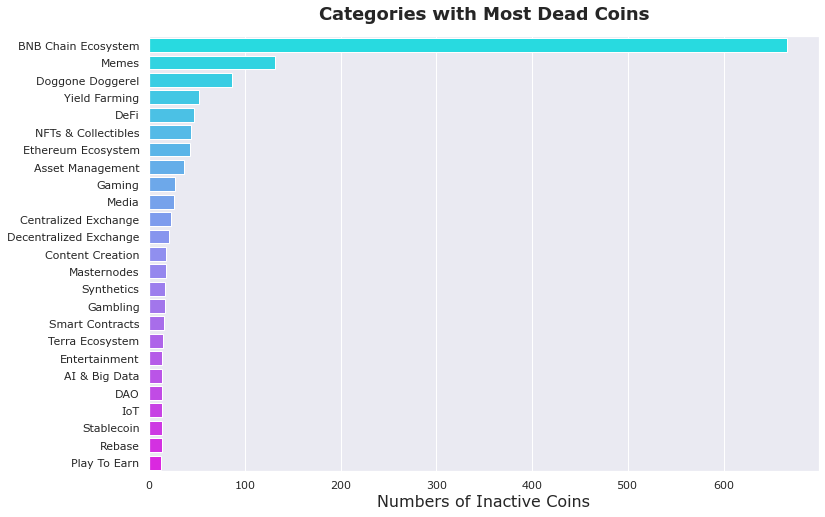

In [412]:
p = sns.barplot(y=dead_coins_25.index,
                   x=dead_coins_25["dead_coins"],
                  data=dead_coins_25, palette="cool")
                
p.set_title("Categories with Most Dead Coins",y=1.025, fontdict= {'fontweight':'bold',"fontsize":18})
p.set_xlabel("Numbers of Inactive Coins", fontsize=16)
p.set_ylabel(None, fontsize=16)

In [413]:
dead_coins_10 = pd.DataFrame(columns=["dead_coins"])
dead_coins_10["dead_coins"] = cat_active_0["cat_name"].value_counts()[0:10]
#dead_coins_10

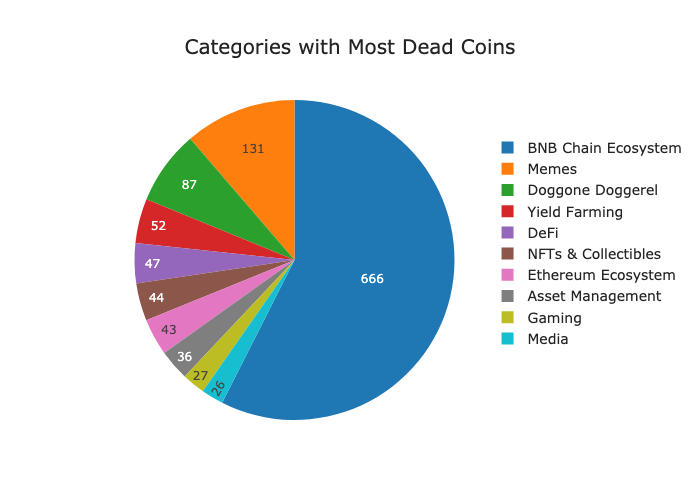

In [404]:
fig4 = px.pie(dead_coins_10, 
              values=dead_coins_10["dead_coins"].values, 
              names=dead_coins_10.index, 
              title="Categories with Most Dead Coins")
fig4.update_traces(textposition='inside', hoverinfo='label+percent', textinfo='value')

fig4.update_layout(
      title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20},
     template="simple_white")

fig4.update_layout(legend_font_size=14)
fig4.update_layout(legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.95))

#fig4.show()
fig4.show("png")     

Text(0, 0.5, '')

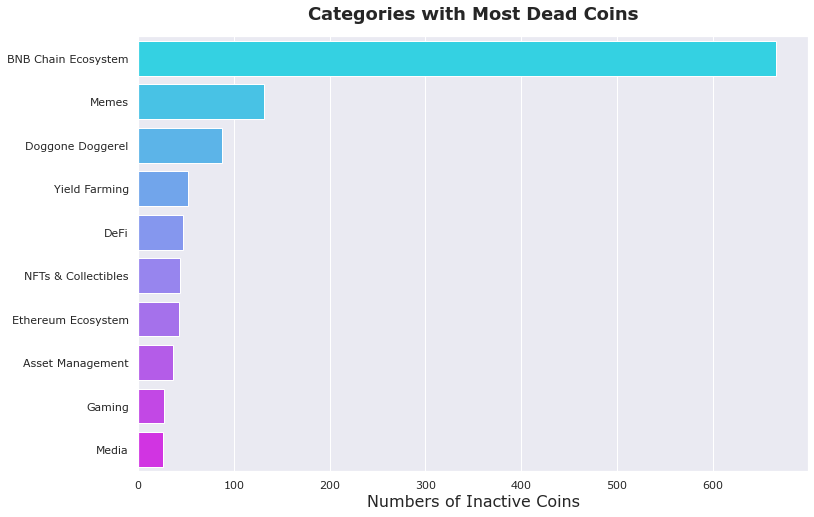

In [376]:
p1 = sns.barplot(y=dead_coins_10.index,
                   x=dead_coins_10["dead_coins"],
                  data=dead_coins_10, palette="cool")
                
p1.set_title("Categories with Most Dead Coins",y=1.025, fontdict= {'fontweight':'bold',"fontsize":18})
p1.set_xlabel("Numbers of Inactive Coins", fontsize=16)
p1.set_ylabel(None, fontsize=16)


In [158]:
cat_name_live = cat_active_1["cat_name"].value_counts()

**Live Coins in the same categories of top 25 dead coins**

In [159]:
cat_name_live.loc[dead_coins_25_list]

BNB Chain Ecosystem       1112
Memes                      161
Doggone Doggerel           111
Yield Farming              162
DeFi                       452
NFTs & Collectibles        467
Ethereum Ecosystem         176
Asset Management            55
Gaming                     343
Media                       55
Centralized Exchange        55
Decentralized Exchange     108
Content Creation            47
Masternodes                105
Synthetics                  11
Gambling                    36
Smart Contracts            128
Terra Ecosystem             14
Entertainment               53
AI & Big Data               48
DAO                        111
IoT                         41
Stablecoin                  55
Rebase                      17
Play To Earn               225
Name: cat_name, dtype: int64

In [380]:
live_cat_25 = cat_name_live.loc[dead_coins_25_list]

[Text(0.5, 1.0, 'Live Coins in Dead coin Categories'),
 Text(0.5, 0, 'Numbers of Active Coins')]

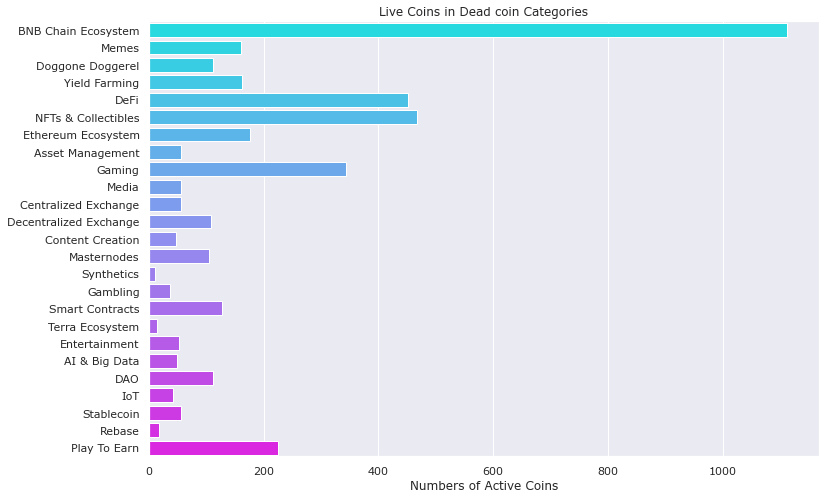

In [381]:
sns.barplot(y=live_cat_25.index,
           x=live_cat_25.values, palette="cool").set(title="Live Coins in Dead coin Categories",
            xlabel="Numbers of Active Coins")

In [382]:
live_cat_10 = cat_name_live.loc[dead_coins_25_list][0:10]


[Text(0.5, 1.0, 'Live Coins in Dead coin Categories'),
 Text(0.5, 0, 'Numbers of Active Coins')]

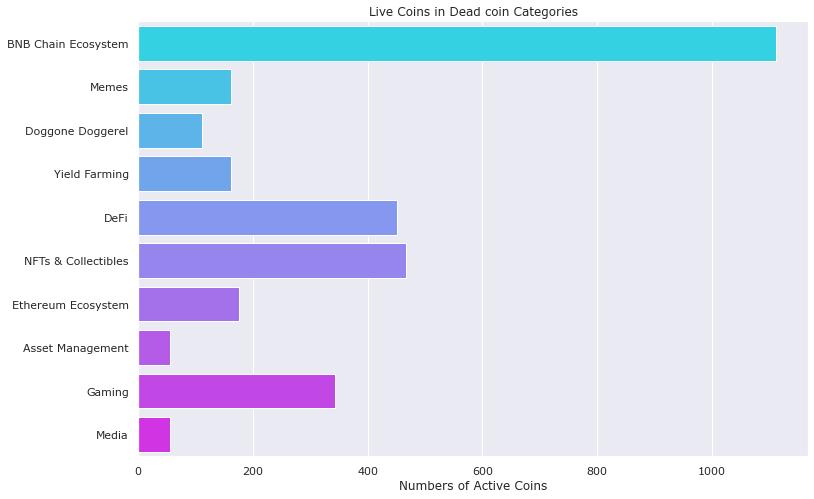

In [383]:
sns.barplot(y=live_cat_10.index,
           x=live_cat_10.values, palette="cool").set(title="Live Coins in Dead coin Categories",
            xlabel="Numbers of Active Coins")

In [165]:
dead_live_cols = ["dead", "live"]

In [166]:
cat_pd = pd.DataFrame(columns=dead_live_cols)

In [167]:
cat_pd["dead"]= dead_coins_25

In [169]:
cat_pd["live"]= live_cat_25

In [170]:
cat_pd

,dead,live
BNB Chain Ecosystem,666,1112
Memes,131,161
Doggone Doggerel,87,111
Yield Farming,52,162
DeFi,47,452
NFTs & Collectibles,44,467
Ethereum Ecosystem,43,176
Asset Management,36,55
Gaming,27,343
Media,26,55


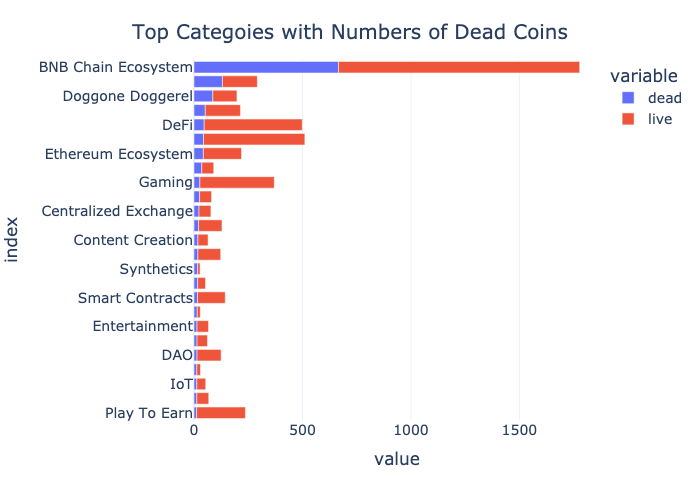

In [409]:
fig3 = px.bar(cat_pd.sort_values(by=["dead"]), x=["dead", "live"])

fig3.update_layout(
    template="plotly_white", #"plotly_dark"                 
    title ={
         'text': "Top Categoies with Numbers of Dead Coins",
         'y':0.95, 
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top' 
        },
     font_size=14)
#fig3.update_traces(width=1)
#fig3.show()
fig3.show("png")